## 场景
有的时候我们对变量背后的东西感兴趣，例如我们能测量学生各学科成绩，我们想了解其背后的“学习能力”。
这种类型的分析依赖于先验的假设，由于它基于理论，探讨理论，所以备受一些理论导向的科学研究青睐，在心理学、社会学、经济学等等学科应用广泛。

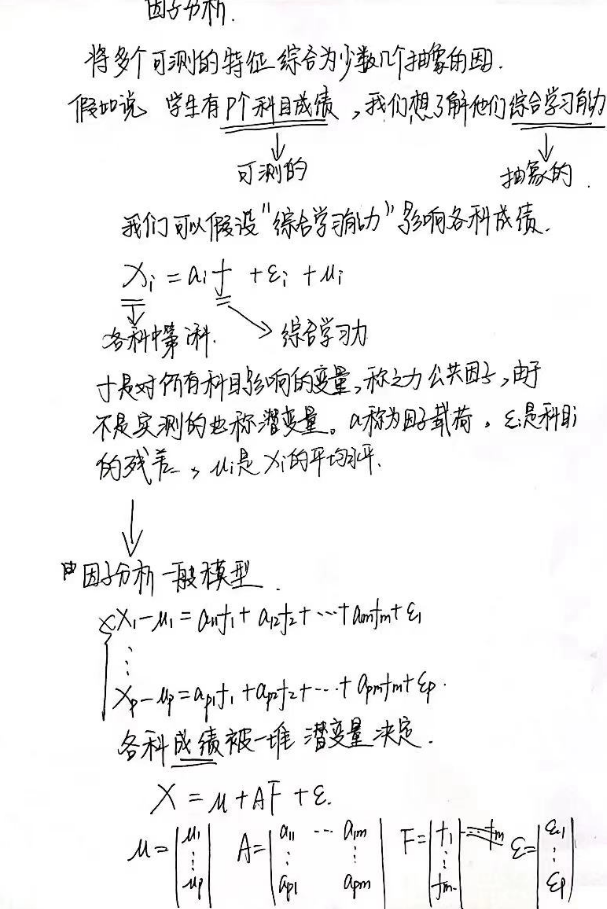

### 有多种方法可以实现参数估计，比较常见的有主成分法，主因子法 和 极大似然法。
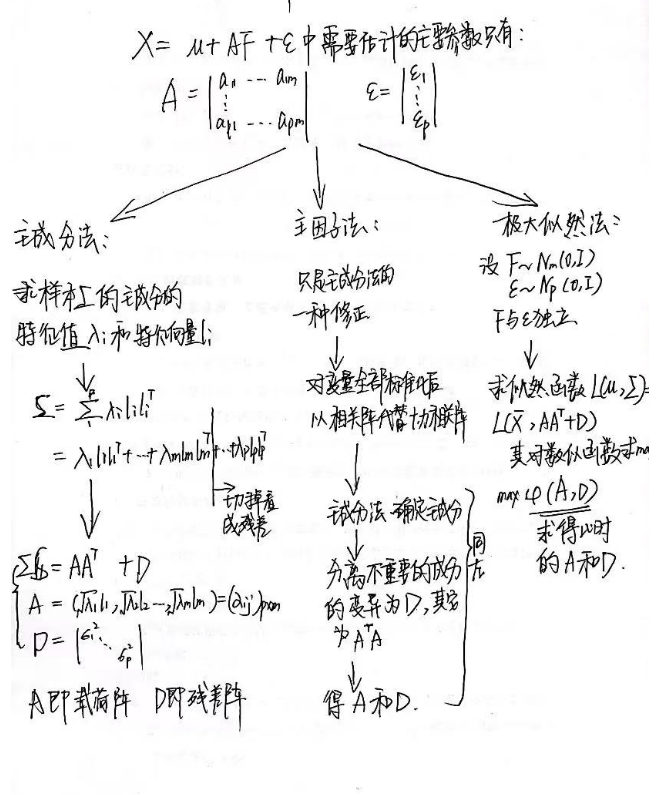

In [ ]:
# 我有一个班学生的各科成绩，我想了解有没有2种因子能够解释各科成绩？
x<-c(1.000,
    0.923, 1.000,
    0.841, 0.851, 1.000,
    0.756, 0.807, 0.870, 1.000,
    0.700, 0.775, 0.835, 0.918, 1.000,
    0.619, 0.695, 0.779, 0.864, 0.928, 1.000,
    0.633, 0.697, 0.787, 0.869, 0.935, 0.975, 1.000,
    0.520, 0.596, 0.705, 0.806, 0.866, 0.932, 0.943, 1.000)
names<-c("语", "数", "英", "史", "地", "生", "物", "化")
study<-matrix(0, nrow=8, ncol=8, dimnames=list(names, names))
for (i in 1:8){
    for (j in 1:i){
        study[i,j]<-x[(i-1)*i/2+j]; study[j,i]<-study[i,j]
}}

In [ ]:
study

In [ ]:
fa<-factanal(factors=2, covmat=study,  rotation="none")
fa

In [ ]:
# 如果直接用原始数据做因子分析,红酒有12种衡量指标，我们假设有两个因子可以解释这12种指标

# 使用红酒的数据
winequality <- read.csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")
head(winequality)

In [ ]:
fa<-factanal(~.,data = winequality,factors=2, rotation="none")
fa

## 因子旋转
如果因子和原特征之间不能明确一个大概的关系，那么我们如何理解因子到底是个什么东西？

为此我们需要做因子旋转！明确原来特征也因子的关系！

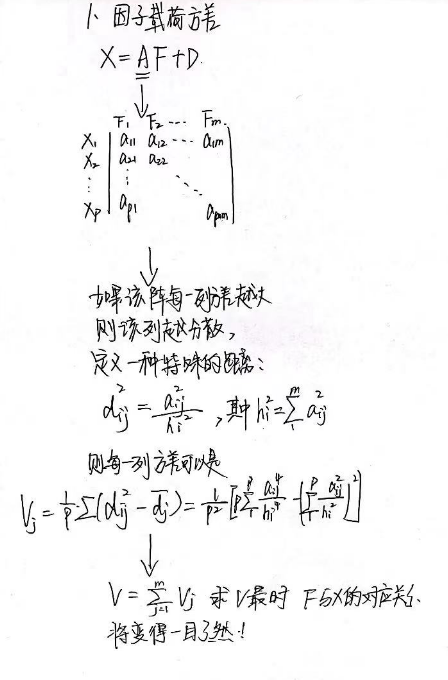

## 如何实现？——方差最大正交旋转
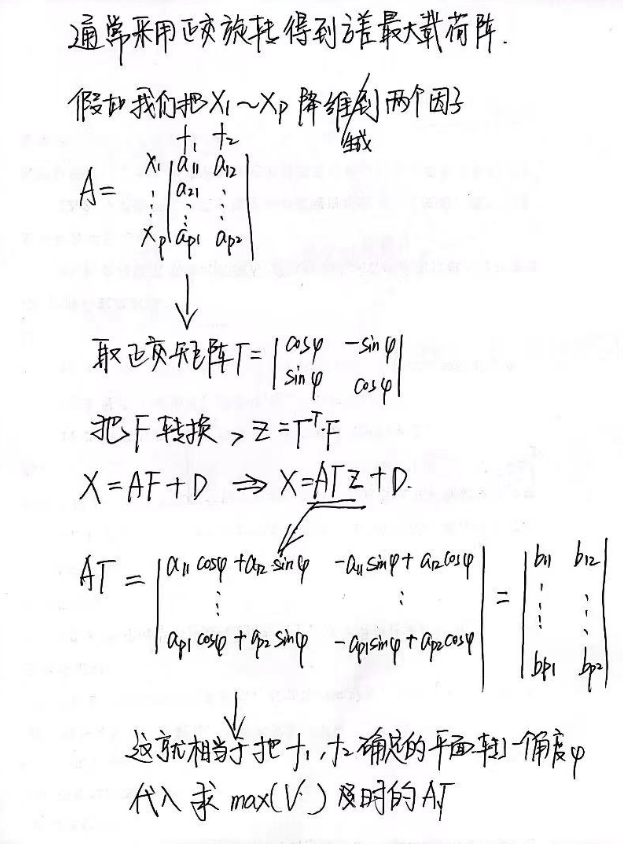

In [ ]:
# 使用rotation=“varimax”完成正交旋转，使用rotation=“promax”为迫近最大方差斜交旋转
fa<-factanal(factors=2, covmat=study,  rotation="varimax")
fa

In [ ]:
fa<-factanal(factors=2, covmat=study,  rotation="promax")
fa

## 因子得分

得到公因子F和残差阵D后，可以反过来求因子得分。主要有两种方法：（1）加权最小二乘（2）回归方法

在factanal中分别对应scores="regression"， scores="Bartlett"

In [19]:
winequality <- read.csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")
head(winequality)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [20]:
fa<-factanal(~.,factors=2, data=winequality,  rotation="varimax", scores = "Bartlett")
fa


Call:
factanal(x = ~., factors = 2, data = winequality, scores = "Bartlett",     rotation = "varimax")

Uniquenesses:
       fixed.acidity     volatile.acidity          citric.acid 
               0.878                0.993                0.975 
      residual.sugar            chlorides  free.sulfur.dioxide 
               0.005                0.874                0.903 
total.sulfur.dioxide              density                   pH 
               0.710                0.005                0.950 
           sulphates              alcohol              quality 
               0.970                0.241                0.811 

Loadings:
                     Factor1 Factor2
fixed.acidity         0.349         
volatile.acidity                    
citric.acid           0.153         
residual.sugar        0.339   0.938 
chlorides             0.354         
free.sulfur.dioxide   0.183   0.252 
total.sulfur.dioxide  0.473   0.257 
density               0.790   0.609 
pH                       

In [21]:
fa$scores

,Factor1,Factor2
1,0.87617410,2.691729432
2,1.04565094,-1.382627318
3,0.50574764,-0.076088677
4,0.45995167,0.275826589
5,0.45995167,0.275826589
6,0.50574764,-0.076088677
7,0.38106527,-0.010899550
8,0.87617410,2.691729432
9,1.04565094,-1.382627318
10,0.89587164,-1.336233990


In [22]:
fa<-factanal(~.,factors=2, data=winequality,  rotation="varimax", scores = "regression")
fa


Call:
factanal(x = ~., factors = 2, data = winequality, scores = "regression",     rotation = "varimax")

Uniquenesses:
       fixed.acidity     volatile.acidity          citric.acid 
               0.878                0.993                0.975 
      residual.sugar            chlorides  free.sulfur.dioxide 
               0.005                0.874                0.903 
total.sulfur.dioxide              density                   pH 
               0.710                0.005                0.950 
           sulphates              alcohol              quality 
               0.970                0.241                0.811 

Loadings:
                     Factor1 Factor2
fixed.acidity         0.349         
volatile.acidity                    
citric.acid           0.153         
residual.sugar        0.339   0.938 
chlorides             0.354         
free.sulfur.dioxide   0.183   0.252 
total.sulfur.dioxide  0.473   0.257 
density               0.790   0.609 
pH                     

In [23]:
fa$scores

,Factor1,Factor2
1,0.89293376,2.670316554
2,1.00731702,-1.352639919
3,0.49473059,-0.068748307
4,0.45431245,0.278331794
5,0.45431245,0.278331794
6,0.49473059,-0.068748307
7,0.37335372,-0.005930039
8,0.89293376,2.670316554
9,1.00731702,-1.352639919
10,0.86110337,-1.308708872
